<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/lectures/GoF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Metrics for Goodness of Fit (GoF)for Regression Models
This section provides an overview of common Analytical Goodness of Fit (GoF) metrics for evaluating regression models.

Goodness of Fit (GoF) metrics help quantify how well a model captures the underlying data patterns. While some metrics, such as R-squared and RMSE, focus on fit accuracy, others like AIC and BIC account for model complexity. By combining multiple GoF metrics, we can make more informed decisions about model performance and select models that generalize better to unseen data.

## 1. R-squared (Coefficient of Determination)

- **Definition**: R-squared measures the proportion of variance in the dependent variable explained by the independent variables.
  
  $$
  R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
  $$
  
  Where:
  - $( \text{SS}_{\text{res}} )$: Residual sum of squares
  - $( \text{SS}_{\text{tot}} )$: Total sum of squares

- **Interpretation**:
  - Ranges from 0 to 1. Higher values indicate a better fit.
  - $ R^2 = 1 $: Perfect fit
  - $ R^2 = 0 $: No fit (model explains none of the variance)

## 2. Adjusted R-squared

- **Definition**: Adjusted R-squared modifies R-squared by accounting for the number of predictors in the model.
  
  $$
  \text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{n - p - 1} \right) (n - 1)
 $$

  Where:
  - $ n $: Number of observations
  - $ p $: Number of predictors

- **Interpretation**:
  - Adjusted R-squared penalizes for adding non-informative variables.
  - Useful for comparing models with different numbers of predictors.


## 3. Akaike Information Criterion (AIC)

- **Definition**: AIC is a relative measure of model quality, balancing fit and complexity.
  
  $$
  \text{AIC} = 2k - 2\ln(L)
  $$
  
  Where:
  - $ k $: Number of model parameters
  - $ L $: Likelihood of the model

- **Interpretation**:
  - Lower AIC values indicate a better model.
  - Use AIC for model comparison (lower AIC is better).
  

## 4. Bayesian Information Criterion (BIC)

- **Definition**: BIC is similar to AIC but applies a stronger penalty for model complexity.
  
  $$
  \text{BIC} = \ln(n)k - 2\ln(L)
  $$
  
  Where:
  - $ n $: Number of data points
  - $ k $: Number of parameters

- **Interpretation**:
  - Like AIC, lower BIC values indicate better models.
  - BIC is more conservative due to the heavier penalty for complexity.

## 5. Residual Sum of Squares (RSS)

- **Definition**: RSS is the total squared difference between observed and predicted values.
  
  $$
  \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Interpretation**:
  - Lower RSS indicates a better fit.
  - Does not penalize for model complexity.


## 6. Mean Squared Error (MSE)

- **Definition**: MSE is the average of the squared differences between observed and predicted values.
  
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$

- **Interpretation**:
  - Lower MSE means better performance.
  - Commonly used in continuous outcome models.

## 7. Root Mean Squared Error (RMSE)

- **Definition**: RMSE is the square root of the MSE, making it more interpretable as it is in the same units as the dependent variable.

$$
 RMSE = \sqrt[2] { \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
$$

- **Interpretation**:
  - Like MSE, lower RMSE values indicate a better fit.
  - More interpretable than MSE because it’s in the same units as the data.

## 8. Log-Likelihood

- **Definition**: The log-likelihood measures how likely the model's parameters are to have generated the observed data.
  
  $$
  \log L(\theta) = \sum_{i=1}^{n} \log P(y_i | X_i, \theta)
  $$

- **Interpretation**:
  - Higher log-likelihood values indicate a better fit.
  - Used in logistic regression and generalized linear models.

## 9. G-Test (Likelihood Ratio Test)

- **Definition**: The G-test (also known as the likelihood ratio test) is used to compare the fit of two nested models by assessing whether the likelihood of the more complex model is significantly better than the simpler model.
  
  $$
  G = 2 \times \left( \log L(\text{model 1}) - \log L(\text{model 2}) \right)
  $$

  Where:
  - $ L(\text{model 1}) $ is the likelihood of the simpler model.
  - $ L(\text{model 2}) $ is the likelihood of the more complex model.

- **Interpretation**:
  - If $ G $ is large and the corresponding p-value is small, this suggests that the more complex model fits significantly better than the simpler one.
  - Used primarily in nested model comparisons.


## 10. Chi-Squared Goodness of Fit Test

- **Definition**: This test compares the observed data to the expected data from the model, used for categorical data.
  
  $$
  \chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
  $$

- **Interpretation**:
  - A significant $ \chi^2 $ value suggests the model doesn't fit well.
  - Often used with contingency tables.

## 11. Hosmer-Lemeshow Test

- **Definition**: Used in logistic regression to assess the fit by comparing observed and predicted event probabilities.
  
  $$
  \chi^2 = \sum_{g=1}^{G} \frac{(O_g - E_g)^2}{E_g}
  $$

- **Interpretation**:
  - Non-significant results suggest a good fit.
  - It groups data into deciles based on predicted probabilities and compares observed vs. expected event rates.

# Cross validation Methods for GoF
Cross-validation is a robust method to assess the goodness of fit (GoF) of a model by dividing the dataset into multiple subsets, training the model on some subsets (training sets), and validating it on the others (validation sets). This technique helps evaluate how well the model generalizes to unseen data, which is crucial for assessing its predictive performance and avoiding overfitting.

Cross-validation-based methods are critical tools for assessing the goodness of fit of a model, particularly for evaluating how well the model generalizes to unseen data. These methods, including k-fold cross-validation, leave-one-out cross-validation, stratified cross-validation, nested cross-validation, and repeated k-fold cross-validation, provide a more robust and reliable measure of performance compared to using a simple train-test split.

## **1. K-Fold Cross-Validation**

**Definition:**
In k-fold cross-validation, the dataset is randomly divided into k equal-sized subsets (folds). The model is trained k times, each time using $k-1$ folds for training and the remaining fold for validation. The performance metrics are averaged over the $k$ iterations to give a robust estimate of model fit.

**Process:**
1. Split the dataset into k equally sized folds.
2. Train the model on k-1 folds and validate it on the remaining fold.
3. Repeat this process k times, each time using a different fold as the validation set.
4. Calculate the average of the chosen performance metric over all k iterations.

**Common Metrics:**
- For regression models: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), $R^2$.
- For classification models: Accuracy, Precision, Recall, F1-Score, Area Under the ROC Curve (AUC-ROC).

**Advantages:**
- **Efficient use of data:** All data points are used for both training and validation.
- **Less biased estimate:** Cross-validation provides a more stable and less biased estimate of model performance than a simple train-test split.

**Disadvantages:**
- **Computational cost:** Training and validating the model k times can be computationally expensive, especially for large datasets or complex models.
- **Randomness:** Performance may vary depending on the random selection of folds, although this is reduced by using more folds (larger k).

**When to Use:**

When you have a moderate-sized dataset and want a robust evaluation of the model’s goodness of fit.
It is widely used in both regression and classification models to test generalizability.


In [ ]:
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
print(f"K-Fold Cross-Validation MSE: {-kf_mse.mean():.4f}")

## **2. Leave-One-Out Cross-Validation (LOO-CV)**

**Definition:**

In leave-one-out cross-validation (LOO-CV), a special case of k-fold cross-validation, each data point is used as a single validation set, and the model is trained on the rest of the dataset. This means n models are trained, where n is the number of data points.


**Process:**
1. For each data point in the dataset, train the model on all the remaining n-1 points.
2. Validate the model on the held-out data point.
3. Repeat this for all data points and calculate the average performance.

**Common Metrics:**

Same as k-fold cross-validation: MSE, RMSE, $R^2$
for regression models, accuracy, precision, recall, etc., for classification models.

**Advantages:**

**Maximizes use of data:** Each data point is used once as a validation set.

**Low bias:** Since each data point is validated individually, LOO-CV often produces unbiased performance estimates.

**Disadvantages:**

**High computational cost:** Running the model n times can be very computationally expensive, especially for large datasets.

**High variance:** Since the training set only leaves out one observation, the validation score for each run may be highly variable, leading to noisy estimates of performance.

**When to Use:**
- For small datasets where maximizing the amount of training data in each iteration is critical.
- For models where the computational cost of training multiple models is not prohibitive.

In [ ]:
# Leave-One-Out Cross-Validation (LOO-CV)
loo = LeaveOneOut()
loo_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=loo)
print(f"Leave-One-Out Cross-Validation MSE: {-loo_mse.mean():.4f}")

## **3. Stratified K-fold Cross-Validation**

**Definition:**

In stratified k-fold cross-validation, the dataset is split into k folds while maintaining the proportion of classes in each fold, which is especially important for imbalanced classification problems. This ensures that each fold has the same proportion of classes as the original dataset.

**Process:**

1. Split the data into k folds while preserving the distribution of class labels.
2. Perform k-fold cross-validation using these stratified folds.
3. Average the performance metrics across all k folds.

**Common Metrics:**

Same as k-fold cross-validation but particularly effective for classification metrics such as accuracy, precision, recall, and Area Under the Curve - Receiver Operator Curve (AUC-ROC).

**Advantages:**

**Better for imbalanced datasets:** Preserves the class distribution, ensuring that each fold is representative of the overall class proportions.

**Reduced variance:** More stable performance estimates compared to random k-fold cross-validation when dealing with imbalanced data.

**Disadvantages:**

**Computational cost:** Like k-fold cross-validation, it requires training the model k times.

**Complexity:** More complex to implement than standard k-fold cross-validation, especially for multiclass problems.

**When to Use:**

- For imbalanced classification problems, where preserving the proportion of classes in each fold is important.
- When evaluating models like logistic regression, decision trees, or any classification model on imbalanced data.


In [ ]:
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Using accuracy here for illustration; MSE cannot be used with stratified splits for continuous y
strat_kf_accuracy = cross_val_score(model, X_train, y_class, scoring='accuracy', cv=strat_kf)
print(f"Stratified K-Fold Cross-Validation Accuracy: {strat_kf_accuracy.mean():.4f}")

## **4. Nested Cross-Validation**

**Definition:**

Nested cross-validation is used when tuning hyperparameters in addition to assessing model performance. It consists of two loops: an inner loop for hyperparameter tuning and an outer loop for assessing the model's performance. This method ensures that hyperparameters are tuned without biasing the model's performance estimate.

**Process:**

1. In the outer loop, split the data into k folds for model evaluation.
2. In the inner loop, use another cross-validation process (usually k-fold) to tune the hyperparameters on the training set of the outer fold.
3. Train the model with the optimal hyperparameters on the inner loop and evaluate it on the validation fold in the outer loop.
4. Repeat the outer loop k times, average the results.

**Common Metrics:**
- MSE, RMSE, and $ R^2 $  for regression models.
- Accuracy, precision, recall, and AUC-ROC for classification models.

**Advantages:**
- **Unbiased hyperparameter tuning:** Ensures that the hyperparameters are selected in a way that generalizes well to unseen data.
- **More realistic performance estimates:** Provides a more reliable measure of model performance after hyperparameter tuning.

**Disadvantages:**

- **Highly computationally expensive:** Since multiple models are trained for both the outer and inner loops, this approach is resource-intensive.
- **Complexity:** Nested cross-validation is more complex to set up and execution compared to standard k-fold cross-validation.

**When to Use:**

- When performing hyperparameter tuning and you want to avoid biased performance estimates.
- Useful for complex models where hyperparameters can significantly affect the model’s performance (e.g., Support Vector Machines, Random Forests, Neural Networks).

In [ ]:
# Nested Cross-Validation Example
from sklearn.model_selection import GridSearchCV

# Define a simple hyperparameter search space
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Inner loop: GridSearch for hyperparameter tuning
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='neg_mean_squared_error')

# Outer loop: Cross-validation to assess generalization error
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
nested_cv_scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='neg_mean_squared_error')
print(f"Nested Cross-Validation MSE: {-nested_cv_scores.mean():.4f}")

## **5. Repeated K-Fold Cross-Validation**

**Definition:**

In repeated k-fold cross-validation, the k-fold cross-validation process is repeated multiple times with different random splits of the data, and the performance metrics are averaged over all the iterations. This reduces the variability in performance estimates.

**Process:**

1. Perform k-fold cross-validation.
2. Repeat the entire k-fold cross-validation process n times with different random splits.
3. Average the performance metrics over all repetitions.

**Common Metrics:**
Same as k-fold cross-validation

**Advantages:**

- **Reduced variability:** By averaging the results over multiple repetitions, this approach provides more reliable performance estimates.
- **More robust than single k-fold:** It reduces the risk of getting an overly optimistic or pessimistic performance estimate based on a single random split.

**Disadvantages:**

- **Increased computational cost:** Repeating k-fold cross-validation several times increases the computation needed to evaluate the model.
- **May be overkill for large datasets:** If the dataset is large and the model is already well-tuned, repeated k-fold cross-validation may not provide much additional benefit.

**When to Use:**

- When you have a moderate sized dataset and want to ensure that the performance estimates are stable across different random data splits.
- When your goal is to obtain the most reliable goodness-of-fit assessment possible.

In [ ]:
# Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rkf_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=rkf)
print(f"Repeated K-Fold Cross-Validation MSE: {-rkf_mse.mean():.4f}")

### **Example Analysis for The Abalone Dataset**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, LeaveOneOut, RepeatedKFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer

# Generate a synthetic regression dataset
# X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


## oR use the abalone dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, header=None, names=column_names)
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
# Find the indices of rows where 'Height' is greater than 0.5
indices_to_drop = df[df['Height'] > 0.5].index
# Drop these rows from the DataFrame
df_filtered = df.drop(indices_to_drop)
# Print the rows of the data to be dropped
rows_to_drop = df.loc[indices_to_drop]
# Drop these rows from the DataFrame in place
df.drop(indices_to_drop, inplace=True)
# Define the feature matrix X and the target variable y (predicting 'Rings' as age)
X = df.drop(columns='Rings').values
y = df['Rings'].values


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a simple Linear Regression model
model = LinearRegression()

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
print(f"K-Fold Cross-Validation MSE: {-kf_mse.mean():.4f}")

# Leave-One-Out Cross-Validation (LOO-CV)
loo = LeaveOneOut()
loo_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=loo)
print(f"Leave-One-Out Cross-Validation MSE: {-loo_mse.mean():.4f}")

# Stratified K-Fold Cross-Validation (Note: Only applicable for classification; here for illustration)
# We create artificial categorical labels for stratification purposes
# y_class = pd.cut(y_train, bins=3, labels=[0, 1, 2])

# strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Using accuracy here for illustration; MSE cannot be used with stratified splits for continuous y
# strat_kf_accuracy = cross_val_score(model, X_train, y_class, scoring='accuracy', cv=strat_kf)
# print(f"Stratified K-Fold Cross-Validation Accuracy: {strat_kf_accuracy.mean():.4f}")

# Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
rkf_mse = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=rkf)
print(f"Repeated K-Fold Cross-Validation MSE: {-rkf_mse.mean():.4f}")

# # Nested Cross-Validation Example
# from sklearn.model_selection import GridSearchCV

# # Define a simple hyperparameter search space
# param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

# # Inner loop: GridSearch for hyperparameter tuning
# inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# grid_search = GridSearchCV(model, param_grid, cv=inner_cv, scoring='neg_mean_squared_error')

# # Outer loop: Cross-validation to assess generalization error
# outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# nested_cv_scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, scoring='neg_mean_squared_error')
# print(f"Nested Cross-Validation MSE: {-nested_cv_scores.mean():.4f}")

# Train the model using all data and evaluate on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {test_mse:.4f}")


K-Fold Cross-Validation MSE: 4.8203
Leave-One-Out Cross-Validation MSE: 4.8323
Repeated K-Fold Cross-Validation MSE: 4.8369
Test Set MSE: 4.5736


# Bootstrap Methods for GoF

Bootstrap methods for goodness of fit are used to assess how well a statistical model fits the data by simulating multiple datasets based on the observed data and evaluating the model’s performance across those simulated datasets. It is particularly useful when the theoretical distribution of test statistics is unknown or difficult to derive.

Bootstrap is a resampling technique that repeatedly samples with replacement from the original dataset to create multiple bootstrap samples. These samples are used to estimate the sampling distribution of a statistic, such as the goodness-of-fit measure.

Bootstrap goodness-of-fit methods can be applied in various modeling scenarios:

 **Linear regression:** Evaluate the fit of linear models by resampling data and assessing R² or mean squared error (MSE).

 **Logistic regression:** Check model performance using deviance, likelihood, or classification metrics.

 **Generalized Linear Models (GLMs):** Evaluate fits based on deviance or other appropriate statistics.

 **Nonlinear models:** When the model assumptions are difficult to verify, the bootstrap can help assess model accuracy.

**Advantages:**

- Does not rely on distributional assumptions for test statistics.
- Provides a way to generate empirical confidence intervals.
- Useful for small sample sizes where asymptotic results may not hold.

**Limitations:**

- Computationally intensive, especially with large datasets.
- Bootstrap results can be sensitive to outliers or highly skewed data.

Depending on the properties of the data being investigated, a variety of tests can be applied to asses model goodness-of-fit for any stastitic of the data.

### **Steps for Bootstrap Goodness-of-Fit**

1. Fit the Model to the Original Data

Start by fitting your model to the original data and compute the goodness-of-fit statistic (e.g., residual sum of squares, R², deviance).

2. Generate Bootstrap Samples

Generate a large number (e.g., 1000 or 10,000) of bootstrap samples by sampling with replacement from the original dataset.

3. Refit the Model to Each Bootstrap Sample

For each bootstrap sample, refit the model and calculate the goodness-of-fit statistic for that sample. This results in a distribution of goodness-of-fit statistics based on the bootstrap samples.

4. Compare the Original Statistic

Compare the original goodness-of-fit statistic to the distribution of the statistics from the bootstrap samples. If the original statistic lies within the central part of the bootstrap distribution (typically within the 95% confidence interval), this indicates that the model fits well. If the original statistic lies in the tails of the distribution, the fit may be poor.

### **Types of Bootstrap Procedures**

**1. Parametric Bootstrap**

Assumes that the data are generated by a known parametric distribution (e.g., normal or binomial). After fitting the model, you generate new bootstrap samples from the fitted parametric model, not directly from the original data.

**2. Nonparametric Bootstrap**

Does not assume a parametric form for the data distribution. Instead, samples are drawn directly from the empirical distribution of the data. This is more flexible but may be less efficient if the data generating process is infact parametric.

### **Alternate Uses**

Bootstrap methods can also provide **bias-corrected estimates of goodness-of-fit statistics and confidence intervals.** For example, you can compute the bootstrap percentile or BCa (bias-corrected and accelerated) intervals for goodness-of-fit measures like the R² or likelihood ratio.

**Bootstrap Residuals**
In regression contexts, a common practice is to bootstrap the residuals to test goodness-of-fit

Bootstrap residuals are used to test if the residuals from the fitted model are consistent with the assumptions of the model (e.g., homoscedasticity or normality).

The residual bootstrap works by:

 1. Fitting the model,
 2. Calculating residuals,
 3. Resampling the residuals, and
 4. Generating new responses by adding the resampled residuals to the fitted values.

Original R²: 0.3229051670412728
95% Confidence Interval for R²: [0.32139248 0.32299071]


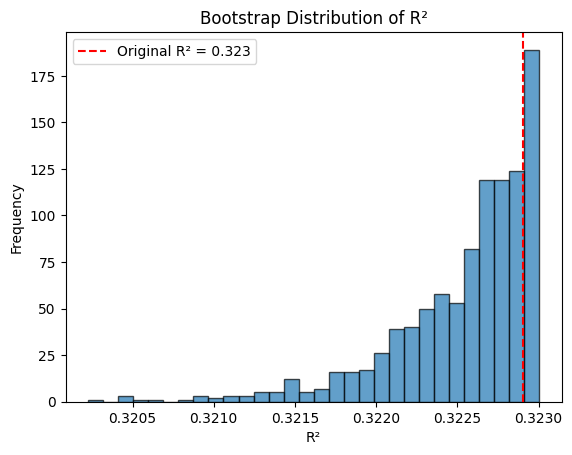

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

## use the abalone dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, header=None, names=column_names)
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
# Find the indices of rows where 'Height' is greater than 0.5
indices_to_drop = df[df['Height'] > 0.5].index
# Drop these rows from the DataFrame
df_filtered = df.drop(indices_to_drop)
# Print the rows of the data to be dropped
rows_to_drop = df.loc[indices_to_drop]
# Drop these rows from the DataFrame in place
df.drop(indices_to_drop, inplace=True)
# Define the feature matrix X and the target variable y (predicting 'Rings' as age)
# X = df.drop(columns='Rings').values
# y = df['Rings'].values

# Select relevant features for the regression model (for simplicity, we use Length to predict Rings)
# X: predictor variable (Length), y: response variable (Rings)
X = df[['Length']].values
y = df['Rings'].values

# Split data into training and test sets (use sklearn's train_test_split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute the goodness-of-fit statistic (R² for simplicity)
r2_original = r2_score(y_test, y_pred)
print(f'Original R²: {r2_original}')

# Number of bootstrap samples
n_bootstraps = 1000

# Bootstrap function to calculate R² for each sample
def bootstrap_r2(X_train, y_train, X_test, y_test, n_bootstraps=1000):
    r2_scores = []

    # Perform bootstrap resampling
    for _ in range(n_bootstraps):
        # Resample the training data (with replacement)
        X_resampled, y_resampled = resample(X_train, y_train, replace=True)

        # Refit the model on the resampled data
        model = LinearRegression()
        model.fit(X_resampled, y_resampled)

        # Predict on the original test set
        y_pred_bootstrap = model.predict(X_test)

        # Calculate R² for the bootstrap sample
        r2 = r2_score(y_test, y_pred_bootstrap)
        r2_scores.append(r2)

    return np.array(r2_scores)

# Generate bootstrap samples and calculate R²
r2_bootstrap = bootstrap_r2(X_train, y_train, X_test, y_test, n_bootstraps=n_bootstraps)

# Can see how the value changes through the bootsrapping
# print(f'Bootstrap R²: {r2_bootstrap}')

# Calculate the 95% confidence interval for the R²
conf_interval = np.percentile(r2_bootstrap, [2.5, 97.5])
print(f'95% Confidence Interval for R²: {conf_interval}')

# Plot the bootstrap distribution of R²
plt.hist(r2_bootstrap, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=r2_original, color='r', linestyle='--', label=f'Original R² = {r2_original:.3f}')
plt.title('Bootstrap Distribution of R²')
plt.xlabel('R²')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create an interactive Plotly histogram of bootstrap R² scores
fig = px.histogram(r2_bootstrap, nbins=30, title="Bootstrap Distribution of R²", labels={'value': 'R²'})
fig.add_vline(x=r2_original, line_dash="dash", line_color="red", annotation_text=f"Original R² = {r2_original:.3f}")

# Customize the layout
fig.update_layout(
    xaxis_title='R²',
    yaxis_title='Frequency',
    title_x=0.5,
    showlegend=False
)

# Show the interactive plot
fig.show()



# Simulation Methods for GoF

Simulation methods for goodness of fit involve generating synthetic datasets under the assumption that the model being tested is correct, and then comparing how well the model fits both the simulated and the observed data. This approach is especially useful when the theoretical distribution of a goodness-of-fit statistic is unknown or when traditional tests are not applicable.

###**Steps in Simulation Methods for Goodness of Fit**

**1. Fit the Model to the Observed Data**

  Begin by fitting the model to the observed data and calculating the goodness-of-fit statistic for this model (e.g., residual sum of squares, likelihood ratio, deviance, R², etc.).

**2. Simulate Datasets Based on the Model Assumptions**

  Generate many synthetic datasets under the assumption that the fitted model is correct. This involves using the fitted model's parameters and the distributional assumptions of the data (e.g., normal distribution for errors in linear regression).

**3. Recalculate the Goodness-of-Fit Statistic for Each Simulated Dataset**

  For each simulated dataset, refit the model and compute the same goodness-of-fit statistic as was calculated for the original data.

**4. Compare the Observed Goodness-of-Fit Statistic with the Simulated Distribution**

  Compare the goodness-of-fit statistic from the observed data with the distribution of goodness-of-fit statistics from the simulated datasets. If the observed statistic is consistent with the values from the simulated data (i.e., it falls within a central region of the distribution), it suggests the model fits well. If the observed statistic lies far in the tails, this suggests poor fit.

  Let's demonstrates the use of simulation methods for assessing goodness of fit using the same linear regression model from the Abalone dataset as in the previous bootstrap example. The goodness-of-fit statistic we’ll use is R², and we’ll compare the observed R² to the distribution of R² values generated by simulating datasets under the fitted model.

Observed R²: 0.940


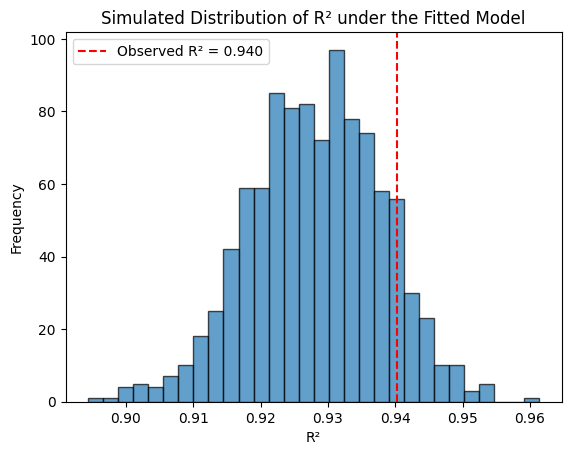

P-value: 0.892


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## use the abalone dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, header=None, names=column_names)
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
# Find the indices of rows where 'Height' is greater than 0.5
indices_to_drop = df[df['Height'] > 0.5].index
# Drop these rows from the DataFrame
df_filtered = df.drop(indices_to_drop)
# Print the rows of the data to be dropped
rows_to_drop = df.loc[indices_to_drop]
# Drop these rows from the DataFrame in place
df.drop(indices_to_drop, inplace=True)

# Select relevant features for the regression model (for simplicity, we use Length to predict Rings)
# X: predictor variable (Length), y: response variable (Rings)
X = df[['Length']].values
y = df['Rings'].values


# Step 1: Generate synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Random values for predictor variable
y = 2.5 * X.flatten() + np.random.normal(0, 2, 100)  # Linear relationship with noise

# Step 2: Fit a linear regression model to the observed data
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_observed = r2_score(y, y_pred)  # R² as the goodness-of-fit measure
print(f'Observed R²: {r2_observed:.3f}')

# Step 3: Simulate new datasets under the fitted model
n_simulations = 1000
r2_simulated = []

# Function to simulate new datasets
def simulate_dataset(model, X, noise_std):
    y_simulated = model.predict(X) + np.random.normal(0, noise_std, X.shape[0])
    return y_simulated

# Simulate datasets and refit the model
for _ in range(n_simulations):
    y_sim = simulate_dataset(model, X, noise_std=2)  # Same noise as in original data
    model_sim = LinearRegression()
    model_sim.fit(X, y_sim)
    y_sim_pred = model_sim.predict(X)
    r2_simulated.append(r2_score(y_sim, y_sim_pred))

# Step 4: Compare the observed R² to the simulated R² distribution
plt.hist(r2_simulated, bins=30, alpha=0.7, edgecolor='k')
plt.axvline(r2_observed, color='red', linestyle='--', label=f'Observed R² = {r2_observed:.3f}')
plt.title('Simulated Distribution of R² under the Fitted Model')
plt.xlabel('R²')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 5: Compute the proportion of simulations with R² less than the observed value
p_value = np.mean(np.array(r2_simulated) <= r2_observed)
print(f'P-value: {p_value:.3f}')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go

# Load the Abalone dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, header=None, names=column_names)

# One-hot encode 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)

# Filter out rows where 'Height' is greater than 0.5
indices_to_drop = df[df['Height'] > 0.5].index
df.drop(indices_to_drop, inplace=True)

# Select relevant features for the regression model (we use Length to predict Rings)
X = df[['Length']].values
y = df['Rings'].values

# Step 1: Fit a linear regression model to the observed data
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_observed = r2_score(y, y_pred)  # R² as the goodness-of-fit measure
print(f'Observed R²: {r2_observed:.3f}')

# Step 2: Simulate new datasets under the fitted model
n_simulations = 1000
r2_simulated = []

# Calculate the standard deviation of the residuals (noise in the data)
residuals = y - y_pred
noise_std = np.std(residuals)

# Function to simulate new datasets based on the fitted model
def simulate_dataset(model, X, noise_std):
    y_simulated = model.predict(X) + np.random.normal(0, noise_std, X.shape[0])
    return y_simulated

# Simulate datasets and refit the model for each simulated dataset
for _ in range(n_simulations):
    y_sim = simulate_dataset(model, X, noise_std)
    model_sim = LinearRegression()
    model_sim.fit(X, y_sim)
    y_sim_pred = model_sim.predict(X)
    r2_simulated.append(r2_score(y_sim, y_sim_pred))

# Step 3: Create an interactive Plotly histogram of simulated R² scores
fig = px.histogram(r2_simulated, nbins=30, title="Simulated Distribution of R²", labels={'value': 'R²'})
fig.add_vline(x=r2_observed, line_dash="dash", line_color="red", annotation_text=f"Observed R² = {r2_observed:.3f}")

# Customize the layout
fig.update_layout(
    xaxis_title='R²',
    yaxis_title='Frequency',
    title_x=0.5,
    showlegend=False
)

# Show the interactive plot
fig.show()

# Step 4: Compute the proportion of simulations with R² less than or equal to the observed value
p_value = np.mean(np.array(r2_simulated) <= r2_observed)
print(f'P-value: {p_value:.3f}')

Observed R²: 0.310


P-value: 0.515
